
# Universidad de los Andes

## Maestría en Inteligencia Analítica para la Toma de Decisiones (Analytics)

## Deep Learning y Redes Neuronales MIIA 4406

 **Nicolás Bernal      Cod. 201014697
 
 **Felipe Carvajal     Cod. 201728562
 
 **Camilo Prada Ladino Cod. 201021153

## Proyecto Kaggle: San Francisco Crime Classification:
### "Predict the category of crimes that occurred in the city by the bay"
### Introducción

Se tiene la base de crimenes reportados en la ciudad de San Francisco para el periodo comprendido entre el 1/1/2003 y  el 5/13/2015, los campos que presenta la base son los siguientes:

*Dates - Fecha y hora en que se registra el crimen.

*Category - La categoria del crimen comentido.

*Descript - Descripción detallada de la categoria del crimen.

*DayOfWeek - Dia de la semana en que se registra el crimen.

*PdDistrict - Nombre del distrito de policia en donde se registra la denuncia del crimen.

*Resolution - Como se soluciona el crimen reportado.

*Address - La dirección aproximada de donde se comete el crimen.

*X - La longitud de la ubicación. 

*Y - La latitud de la ubicación.

Para poder explorar la base de datos es necesario generar variables de referencia de los registros, así las cosas despues de cargar la base se procede a generar las variables de año, mes, dia y hora buscando con esto poder analizar graficamente la ocurrencia de eventos.

Nota: kernel basado en

# Análisis Descriptivo

In [11]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np

In [12]:
crime_train = pd.read_csv("../Deep Learning/input2/train.csv", sep=',',error_bad_lines=False,parse_dates=['Dates'])
crime_test  = pd.read_csv("../Deep Learning/input2/test.csv",  sep=',',error_bad_lines=False,parse_dates=['Dates'])

In [13]:
crime_train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [14]:
crime_test

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
5,5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172
6,6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351
7,7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750
8,8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165
9,9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886


In [15]:
print(crime_train.describe())

                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000


Con la base cargada, se procede a revisar la existencia de NA´s en las variables.

In [16]:
print(crime_train.isnull().sum())

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


#### Numero de Eventos por Distrito

Una vez generadas las variables de referencia, y despues de revisar la no existencia de NA´s se procede a buscar el distrito policial con mayor reporte de incidentes.

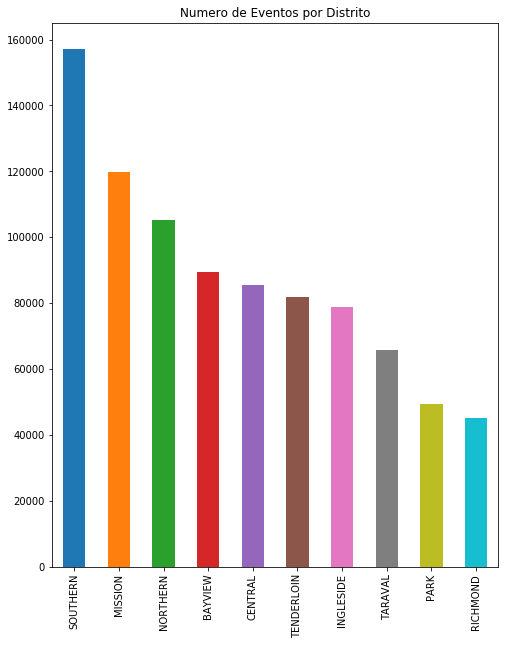

In [17]:
crime_train.PdDistrict.value_counts().plot(title='Numero de Eventos por Distrito', kind='bar', figsize=(8,10))
pl.savefig('Numero de Eventos por Distrito.png')

Así las cosas, se encuentra que el distrito policial Southern es el que mas reportes de incidentes recibe, así las cosas de manera preliminar se percibe como el mas peligroso.

### Numero Casos Mensuales por Año

Con base en la información anterior se procede a revisar la estacionalidad de los reportes, este trabajo se traduce en revisar si existe un patron de reportes en una frecuencia de tiempo periodica. Para el caso que nos compete se analizará la frecuencia de reportes mensuales por año.

In [18]:
crime_train['Year']  = crime_train['Dates'].map(lambda x: x.year)
crime_train['Month'] = crime_train['Dates'].map(lambda x: x.month)
crime_train['Day']   = crime_train['Dates'].map(lambda x: x.day)
crime_train['Hour']  = crime_train['Dates'].map(lambda x: x.hour)

In [19]:
crime_train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015,5,13,23
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015,5,13,23
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015,5,13,23
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,2015,5,13,23
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,2015,5,13,23


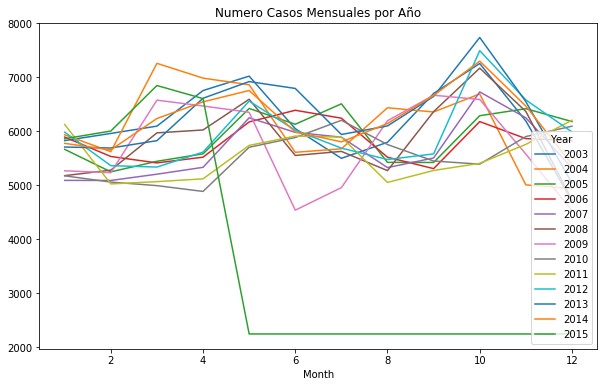

In [20]:
crime_train['event']  = 1
eventos_mensuales     = crime_train[['Month','Year','event']].groupby(['Year','Month']).count().reset_index()
eventos_mensuales_ano = eventos_mensuales.pivot(index='Month', columns='Year', values='event').fillna(method='ffill')
ax = eventos_mensuales_ano.interpolate().plot(title='Numero Casos Mensuales por Año', figsize=(10,6))

Con base en la evidencia gráfica presentada, se infiere un aumento de reportes en el mes de Octubre, para el segundo semestre, siendo este el comportamiento más marcado y en Mayo para el primer semeste. Cabe resaltar que el comportamiento atipico del año 2015 obedece a que los reportes están acotados hasta el mes de mayo.

#### Cantidad de Eventos Diarios

Para profundizar el análisis de los datos, se procede a revisar de la semana cuales on los dias en que mas se presentan reportes de crimenes.

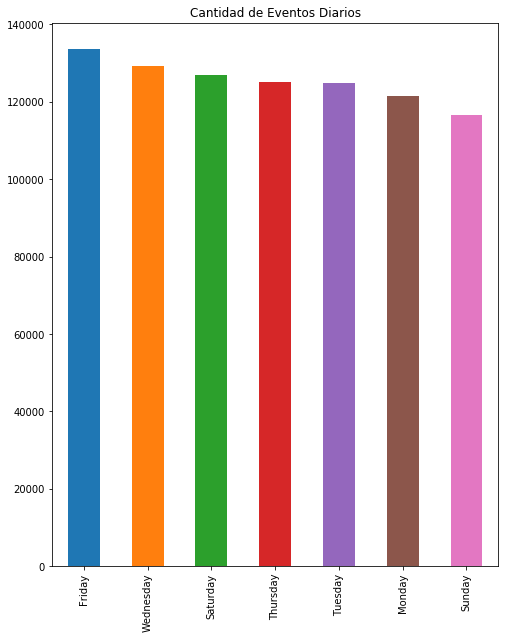

In [21]:
crime_train.DayOfWeek.value_counts().plot(title='Cantidad de Eventos Diarios', kind='bar', figsize=(8,10))
pl.savefig('Cantidad de Eventos Diarios.png')

En linea con la intuición acerca de la criminalidad en las ciudades, el dia viernes se presentan mayor número de reportes.

#### Numero de Eventos por Hora

Con es fin de identificar el comportamiento diario de los reportes, se presenta a continuación el análisis por franja horaria de los crímenes reportados.

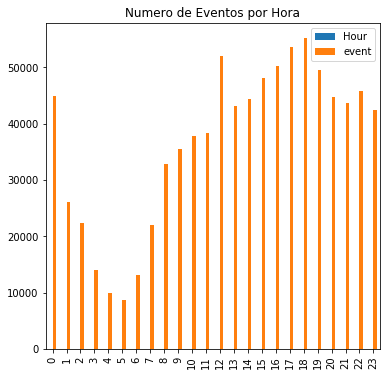

In [22]:
eventos_hora = crime_train[['Hour','event']].groupby(['Hour']).count().reset_index()
eventos_hora.plot(title = 'Numero de Eventos por Hora', kind='bar', figsize=(6, 6))
pl.savefig('Numero de Eventos por Hora.png')

Nuevamente respondiendo a la intuición las franjas horarias de la noche y la madrugada son las que presentan mayor número de reportes, cabe resaltar la cantidad de reportes generados al medio dia.

#### Casos Franjas Horarias por Distrito

Ahora se presenta un cruce bivariado, buscando identificar las franjas horarias de los reportes desagregadas por distrito

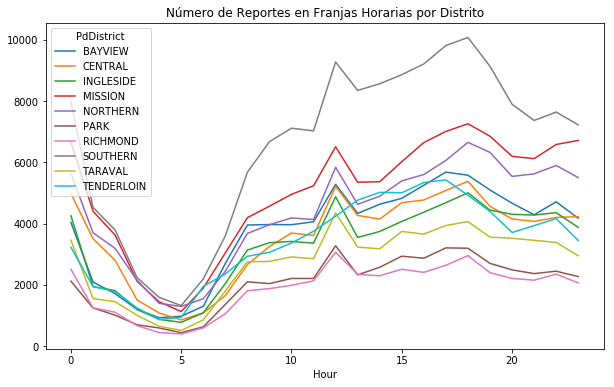

In [23]:
hora_distrito_evento = crime_train[['PdDistrict','Hour','event']].groupby(['PdDistrict','Hour']).count().reset_index()
hora_distrito_evento_pivot = hora_distrito_evento.pivot(index='Hour', columns='PdDistrict', values='event').fillna(method='ffill')
hora_distrito_evento_pivot.interpolate().plot(title='Número de Reportes en Franjas Horarias por Distrito', figsize=(10,6))
pl.savefig('Número de Reportes en Franjas Horarias por Distrito.png')

En la gráfica se hace evidente el valle en los reportes generados en la madrugada antes de las seis de la mañana, se hace evidente también la marcada diferencia entre el distrito con mayor percepción de insegruidad SOUTHERN y el de menor percepción RICHMOND.

#### Análisis por Categorias de Crimen

Inicialmente se presentan las categorias con mayor número de incidencias.

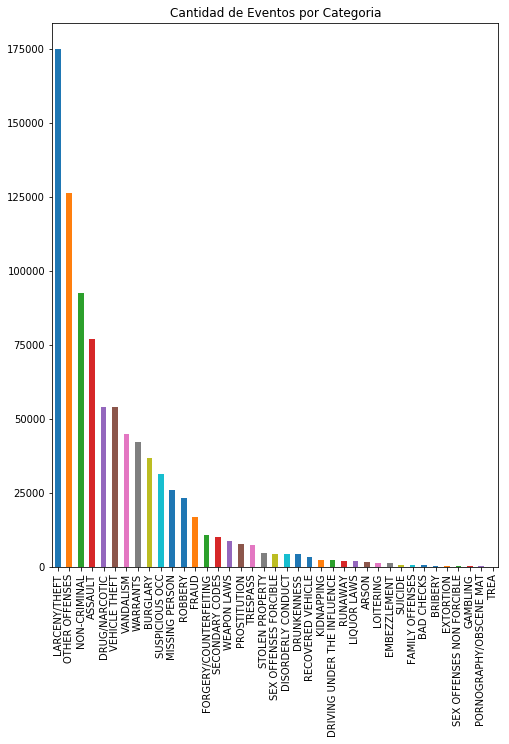

In [46]:
crime_train.Category.value_counts().plot(title='Cantidad de Eventos por Categoria', kind='bar', figsize=(8,10))
pl.savefig('Cantidad de Eventos por Categoria.png')

Se evidencia una alta concentración en tres categorias de crimenes, dentro de las cuales se destaca la categoria de otras ofensas "OTHERS OFFENSES", para poder aterrizar más las conclusiones del gráfico se hace necesario abordar el análisis a través de un análisis de Pareto para determinar la concentación por categoria de los reportes.

#### Análisis de Pareto

Con este se busca presentar la concentración de los reportes por categoria, buscando concluir acerca del número de incidentes presentados.

C:\Users\felip\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


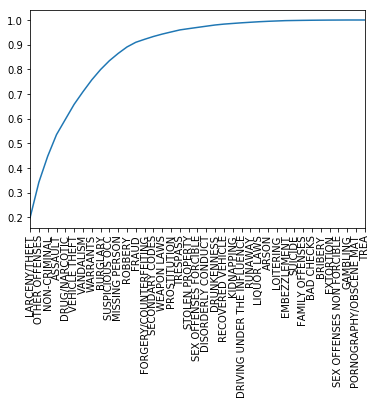

In [53]:
numero_crimenes = crime_train.Category.value_counts()
pareto = numero_crimenes / sum(numero_crimenes)
pareto = pareto.cumsum()
pareto_crime_plot = sns.tsplot(data=pareto)
pareto_crime_plot.set_xticklabels(pareto.index,rotation=90)
pareto_crime_plot.set_xticks(np.arange(len(pareto)))

pl.savefig('Análiss de Pareto.png')

Como conclusión al analisis se encuentra que el 90% de los reportes se concentran en las primeras nueve categorias, lo cual da indicios acerca del pefil del crimen en la ciudad de San Francisco.

#### Número de Eventos por Categorias Reportados por Distrito

Teniendo el panorama de las categorias con mayor numero de eventos reportados y los distritos con mayor número de incidencias, se aborda el análisis buscando desagegar por distrito el mapa de reportes presentados.

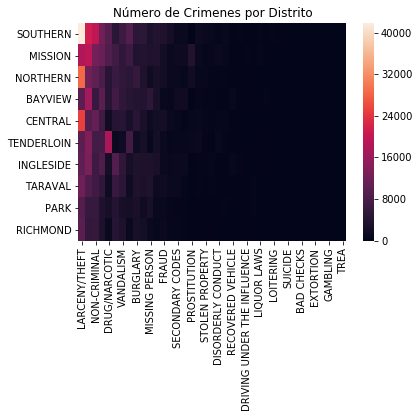

In [55]:
distritos_peligrosos = crime_train.PdDistrict.value_counts()
pt = pd.pivot_table(crime_train,index="PdDistrict",columns="Category",aggfunc=len,fill_value=0)["Dates"]
_ = pt.loc[distritos_peligrosos.index,numero_crimenes.index]
ax = sns.heatmap(_)
ax.set_title("Número de Crimenes por Distrito")
pl.savefig('Número de Crimenes por Distrito.png')

Se encuentra que el robo y las actividades relacionadas con drogas tienen una incidendia muy fuerte en el distrito Southern, sin embargo, esta conclusión no difiere mucho de las que se han venido presentando con antelación. Así las cosas se hace necesario presentar la distribución de la categoria por eventos desagregado por distrito con el fin de detectar patrones menos evidentes.

#### Distribución de Categorias Reportadas por Distrito

Se busca mapear la distribución de las categorias reportadas, buscando encontrar patrones de incidentes por distrito.

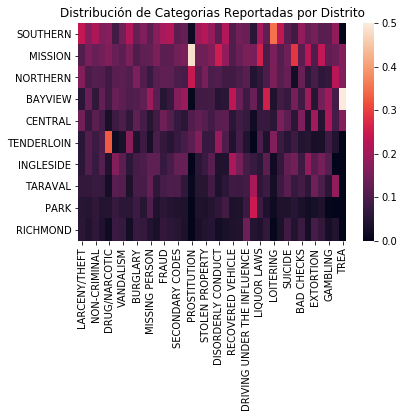

In [56]:
pt = pd.pivot_table(crime_train,index="PdDistrict",columns="Category",aggfunc=len,fill_value=0)["Dates"]
pt = pt/pt.sum(axis = 0)
_ = pt.loc[distritos_peligrosos.index,numero_crimenes.index]
ax = sns.heatmap(_)
ax.set_title("Distribución de Categorias Reportadas por Distrito")
pl.savefig('Distribución de Categorias Reportadas por Distrito.png')

Como conclusión general encontramos que el distrito Southern presenta problemas por vagancia y leyes de licor lo cual permite inferir un alto nivel de indigencia en este distrito. Los distritos Mission y Bayview presentan un alto impacto con delitos relacionados con la prostitución, finalmente los reportes del distrito Richmond el cual presenta mejor percepción de seguridad están concentrados en delitos menores como conducir bajo la influencia del alcohol.

# Preparación de la Información

In [101]:
crime_train = pd.read_csv("../input/train.csv", sep=',',error_bad_lines=False)
crime_test  = pd.read_csv("../input/test.csv",  sep=',',error_bad_lines=False)

In [102]:
crime_train['Region'] = crime_train['PdDistrict'].astype('category')
crime_test['Region']  = crime_test['PdDistrict'].astype('category')

In [103]:
crime_train["Region"]

0           NORTHERN
1           NORTHERN
2           NORTHERN
3           NORTHERN
4               PARK
5          INGLESIDE
6          INGLESIDE
7            BAYVIEW
8           RICHMOND
9            CENTRAL
10           CENTRAL
11           TARAVAL
12        TENDERLOIN
13          NORTHERN
14           BAYVIEW
15           BAYVIEW
16        TENDERLOIN
17         INGLESIDE
18           BAYVIEW
19        TENDERLOIN
20         INGLESIDE
21         INGLESIDE
22        TENDERLOIN
23        TENDERLOIN
24          NORTHERN
25        TENDERLOIN
26          NORTHERN
27         INGLESIDE
28           TARAVAL
29           TARAVAL
             ...    
878019      SOUTHERN
878020      NORTHERN
878021      NORTHERN
878022       MISSION
878023    TENDERLOIN
878024          PARK
878025       BAYVIEW
878026       BAYVIEW
878027      SOUTHERN
878028      SOUTHERN
878029    TENDERLOIN
878030    TENDERLOIN
878031       BAYVIEW
878032      NORTHERN
878033      RICHMOND
878034      RICHMOND
878035      N

In [104]:
def getHourClass(hour):
    return "H"+str(hour)

In [105]:
def extractHours(row):
    date, time = row.split()
    h = int(time[0:2])
    return getHourClass(h)

In [106]:
crime_train['Hour'] = crime_train.apply(lambda row:extractHours(row['Dates']), axis=1)
crime_test['Hour']  = crime_test.apply(lambda row: extractHours(row['Dates']), axis=1)

In [107]:
crime_train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Region,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NORTHERN,H23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NORTHERN,H23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,NORTHERN,H23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,NORTHERN,H23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,PARK,H23
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,INGLESIDE,H23
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,INGLESIDE,H23
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,BAYVIEW,H23
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,RICHMOND,H23
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,CENTRAL,H23


In [176]:
crime_test

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Region,Hour,Month
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,BAYVIEW,H23,M5
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,BAYVIEW,H23,M5
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,NORTHERN,H23,M5
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,INGLESIDE,H23,M5
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,INGLESIDE,H23,M5
5,5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172,TARAVAL,H23,M5
6,6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351,INGLESIDE,H23,M5
7,7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750,INGLESIDE,H23,M5
8,8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165,MISSION,H23,M5
9,9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886,CENTRAL,H23,M5


In [108]:
def getMonthClass(month):
    return 'M'+str(month)

In [109]:
def extractMonths(row):
    date, time = row.split()
    h = int(date[5:7])
    return getMonthClass(h)

In [110]:
crime_train['Month'] = crime_train.apply(lambda row: extractMonths(row['Dates']), axis=1)
crime_test['Month'] = crime_test.apply(lambda row: extractMonths(row['Dates']), axis=1)

In [111]:
crime_train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Region,Hour,Month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NORTHERN,H23,M5
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NORTHERN,H23,M5
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,NORTHERN,H23,M5
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,NORTHERN,H23,M5
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,PARK,H23,M5
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,INGLESIDE,H23,M5
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,INGLESIDE,H23,M5
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,BAYVIEW,H23,M5
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,RICHMOND,H23,M5
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,CENTRAL,H23,M5


In [112]:
from sklearn import preprocessing

In [113]:
leCrime = preprocessing.LabelEncoder()
crime = leCrime.fit_transform(crime_train.Category)

In [114]:
crime_train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Region,Hour,Month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NORTHERN,H23,M5
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NORTHERN,H23,M5
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,NORTHERN,H23,M5
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,NORTHERN,H23,M5
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,PARK,H23,M5
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,INGLESIDE,H23,M5
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,INGLESIDE,H23,M5
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,BAYVIEW,H23,M5
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,RICHMOND,H23,M5
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,CENTRAL,H23,M5


In [115]:
days = pd.get_dummies(crime_train.DayOfWeek)
region = pd.get_dummies(crime_train.Region)
hour = pd.get_dummies(crime_train.Hour) 
month = pd.get_dummies(crime_train.Month)

In [116]:
crime_train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Region,Hour,Month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NORTHERN,H23,M5
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NORTHERN,H23,M5
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,NORTHERN,H23,M5
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,NORTHERN,H23,M5
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,PARK,H23,M5
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,INGLESIDE,H23,M5
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,INGLESIDE,H23,M5
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,BAYVIEW,H23,M5
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,RICHMOND,H23,M5
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,CENTRAL,H23,M5


In [117]:
trainData = pd.concat([hour, days, region, month], axis=1)
trainData['crime']=crime

In [118]:
trainData

,H0,H1,H10,H11,H12,H13,H14,H15,H16,H17,...,M12,M2,M3,M4,M5,M6,M7,M8,M9,crime
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,37
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,21
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,21
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,16
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,16
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,16
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,36
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,36
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,16
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,16


In [119]:
days = pd.get_dummies(crime_test.DayOfWeek)
region = pd.get_dummies(crime_test.Region)
hour = pd.get_dummies(crime_test.Hour)
month = pd.get_dummies(crime_test.Month)

testData = pd.concat([crime_test.Id, hour, days, region, month], axis=1)

In [120]:
testData

,Id,H0,H1,H10,H11,H12,H13,H14,H15,H16,...,M11,M12,M2,M3,M4,M5,M6,M7,M8,M9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
features = ['H0', 'H1', 'H2', 'H3', 'H4','H5','H6','H7','H8','H9','H10','H11','H12','H13','H14','H15','H16','H17','H18','H19','H20','H21','H22','H23',\
            'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',\
            'BAYVIEW','CENTRAL','INGLESIDE','MISSION',\
            'NORTHERN','PARK','RICHMOND','SOUTHERN','TARAVAL','TENDERLOIN',\
            'M1', 'M2', 'M3', 'M4','M5','M6','M7','M8','M9','M10','M11','M12']

# Random Forest

In [142]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
parameters = {'n_estimators':100,'criterion':'gini','max_depth':15}

In [146]:
rf = RandomForestClassifier()
rf.set_params(**parameters)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [235]:
f = rf.fit(trainData[features], trainData['crime'])
rf_predicted = np.array(f.predict_proba(testData[features]))

In [231]:
colmn = ["ARSON","ASSAULT","BAD CHECKS","BRIBERY","BURGLARY","DISORDERLY CONDUCT","DRIVING UNDER THE INFLUENCE","DRUG/NARCOTIC","DRUNKENNESS","EMBEZZLEMENT","EXTORTION","FAMILY OFFENSES","FORGERY/COUNTERFEITING","FRAUD","GAMBLING","KIDNAPPING","LARCENY/THEFT","LIQUOR LAWS","LOITERING","MISSING PERSON","NON-CRIMINAL","OTHER OFFENSES","PORNOGRAPHY/OBSCENE MAT","PROSTITUTION","RECOVERED VEHICLE","ROBBERY","RUNAWAY","SECONDARY CODES","SEX OFFENSES FORCIBLE","SEX OFFENSES NON FORCIBLE","STOLEN PROPERTY","SUICIDE","SUSPICIOUS OCC","TREA","TRESPASS","VANDALISM","VEHICLE THEFT","WARRANTS","WEAPON LAWS"]
result_rf = pd.DataFrame(rf_predicted, columns=colmn)

In [217]:
result_rf

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0.011659,0.099956,0.000169,0.000436,0.035856,0.001873,0.003137,0.051349,0.002271,0.000713,...,0.000150,0.005445,0.000340,0.040968,2.008155e-05,0.004925,0.064410,0.099372,0.047363,0.019474
1,0.011659,0.099956,0.000169,0.000436,0.035856,0.001873,0.003137,0.051349,0.002271,0.000713,...,0.000150,0.005445,0.000340,0.040968,2.008155e-05,0.004925,0.064410,0.099372,0.047363,0.019474
2,0.001396,0.081828,0.000406,0.000151,0.053029,0.003828,0.002844,0.045596,0.004864,0.000854,...,0.000107,0.006394,0.000546,0.030008,4.858931e-06,0.006629,0.053332,0.060177,0.045581,0.007981
3,0.002786,0.113996,0.000160,0.000454,0.034208,0.001995,0.003237,0.032687,0.006783,0.000669,...,0.000120,0.005515,0.000883,0.035901,3.933789e-07,0.004076,0.067685,0.124337,0.029964,0.015140
4,0.002786,0.113996,0.000160,0.000454,0.034208,0.001995,0.003237,0.032687,0.006783,0.000669,...,0.000120,0.005515,0.000883,0.035901,3.933789e-07,0.004076,0.067685,0.124337,0.029964,0.015140
5,0.002447,0.083938,0.000314,0.000136,0.045053,0.004006,0.003095,0.023837,0.008557,0.000594,...,0.000106,0.003496,0.000439,0.036552,5.136346e-07,0.004154,0.091270,0.103652,0.022232,0.007815
6,0.002786,0.113996,0.000160,0.000454,0.034208,0.001995,0.003237,0.032687,0.006783,0.000669,...,0.000120,0.005515,0.000883,0.035901,3.933789e-07,0.004076,0.067685,0.124337,0.029964,0.015140
7,0.002786,0.113996,0.000160,0.000454,0.034208,0.001995,0.003237,0.032687,0.006783,0.000669,...,0.000120,0.005515,0.000883,0.035901,3.933789e-07,0.004076,0.067685,0.124337,0.029964,0.015140
8,0.000935,0.092154,0.000225,0.000533,0.030051,0.010999,0.003324,0.074494,0.006391,0.000656,...,0.000159,0.007058,0.000443,0.029535,5.102717e-06,0.007086,0.048994,0.068031,0.049389,0.013344
9,0.001075,0.075857,0.001537,0.000205,0.051368,0.004770,0.002668,0.030126,0.009342,0.000996,...,0.000044,0.004847,0.000598,0.030042,7.525077e-06,0.011129,0.059952,0.063003,0.036741,0.005360


In [183]:
result_rf.to_csv("submission_rf.csv",index=True, index_label = 'Id')

## knn Model

In [151]:
X_train = trainData[features]
y_train = trainData['crime']

X_test = testData[features]

In [152]:
X_train

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [177]:
X_test

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [155]:
knn_predicted = knn.predict(X_test)

In [156]:
knn_predicted

array([21, 21,  1, ..., 21, 16,  1], dtype=int64)

In [158]:
colmn = ["ARSON","ASSAULT","BAD CHECKS","BRIBERY","BURGLARY","DISORDERLY CONDUCT","DRIVING UNDER THE INFLUENCE","DRUG/NARCOTIC","DRUNKENNESS","EMBEZZLEMENT","EXTORTION","FAMILY OFFENSES","FORGERY/COUNTERFEITING","FRAUD","GAMBLING","KIDNAPPING","LARCENY/THEFT","LIQUOR LAWS","LOITERING","MISSING PERSON","NON-CRIMINAL","OTHER OFFENSES","PORNOGRAPHY/OBSCENE MAT","PROSTITUTION","RECOVERED VEHICLE","ROBBERY","RUNAWAY","SECONDARY CODES","SEX OFFENSES FORCIBLE","SEX OFFENSES NON FORCIBLE","STOLEN PROPERTY","SUICIDE","SUSPICIOUS OCC","TREA","TRESPASS","VANDALISM","VEHICLE THEFT","WARRANTS","WEAPON LAWS"]

In [195]:
result_knn = pd.DataFrame({'Id': crime_test['Id']})
for key in colmn:
    result_knn[key] = 0
count = 0
for item in knn_predicted:
    #print(item)
    for val in colmn:
        #print(result_dataframe.columns.get_loc(val))
        if( result_knn.columns.get_loc(val) == item):
            result_knn.at[count,val] = 1
    count+=1

In [196]:
result_knn

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
#result_dataframe.iloc[1][1]
result_knn.to_csv("submission_knn.csv", index=False)

## Logistic Model

In [161]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
log_predicted = log.predict(X_test)

In [198]:
colmn = ["ARSON","ASSAULT","BAD CHECKS","BRIBERY","BURGLARY","DISORDERLY CONDUCT","DRIVING UNDER THE INFLUENCE","DRUG/NARCOTIC","DRUNKENNESS","EMBEZZLEMENT","EXTORTION","FAMILY OFFENSES","FORGERY/COUNTERFEITING","FRAUD","GAMBLING","KIDNAPPING","LARCENY/THEFT","LIQUOR LAWS","LOITERING","MISSING PERSON","NON-CRIMINAL","OTHER OFFENSES","PORNOGRAPHY/OBSCENE MAT","PROSTITUTION","RECOVERED VEHICLE","ROBBERY","RUNAWAY","SECONDARY CODES","SEX OFFENSES FORCIBLE","SEX OFFENSES NON FORCIBLE","STOLEN PROPERTY","SUICIDE","SUSPICIOUS OCC","TREA","TRESPASS","VANDALISM","VEHICLE THEFT","WARRANTS","WEAPON LAWS"]

In [199]:
result_logistic = pd.DataFrame({'Id': crime_test['Id']})
for key in colmn:
    result_logistic[key] = 0
count = 0
for item in log_predicted:
    #print(item)
    for val in colmn:
        #print(result_dataframe.columns.get_loc(val))
        if( result_logistic.columns.get_loc(val) == item):
            result_logistic.at[count,val] = 1
    count+=1

In [236]:
result_logistic

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#result_dataframe.iloc[1][1]
result_logistic.to_csv("submission_logistic.csv", index=False)